In [4]:

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path='../data/processed/'
file='clean_data.csv'
encode='latin-1'
#A file elso sora folosleges, encoding hibat ad ki a program utf-8 encodolasra, es a csv ';'-el van elvalasztva.
try:
    df=pd.read_csv(path+file, encoding=encode, delimiter=',')
    
except UnicodeDecodeError:
    print("Unicode error: "+encode+" nem mukodik")
except FileNotFoundError:
    print("A file nem talalhato a "+path+" mappaban")
else:
    print(df)

     Év  Informatikai szakembereket  alkalmazó vállalkozások  \
0  2014                                                NaN     
1  2015                                               27.5     
2  2016                                               27.4     
3  2017                                               28.7     
4  2018                                               27.9     
5  2019                                               27.4     
6  2020                                               30.2     
7  2021                                               30.3     
8  2022                                               30.6     
9  2023                                               32.0     

   Informatikai szakemberei részére képzést biztosító vállalkozások  \
0                                                7.7                  
1                                                8.1                  
2                                                8.5                  
3          

In [6]:
df

,Év,Informatikai szakembereket alkalmazó vállalkozások,Informatikai szakemberei részére képzést biztosító vállalkozások,Nem informatikai szakemberei részére informatikai képzést biztosító vállalkozások,Informatikai szakember állást meghírdetõ vállalkozások,"Vállalkozások, akik nehezen tudták a meghírdetett informatikai állásokat betölteni"
0,2014,NaN,7.7,13.3,10.4,4.8
1,2015,27.5,8.1,13.3,10.7,5.7
2,2016,27.4,8.5,14.1,11.5,6.3
3,2017,28.7,8.1,14.3,11.8,7.0
4,2018,27.9,8.7,13.6,10.8,6.2
5,2019,27.4,8.0,13.9,8.2,4.6
6,2020,30.2,8.3,13.6,6.9,3.9
7,2021,30.3,9.0,14.8,8.3,5.0
8,2022,30.6,9.3,16.0,7.3,5.0
9,2023,32.0,NaN,NaN,NaN,NaN


In [7]:
#az osszehasonlitast kezdem az elso oszloppal, es azt osszehasonlitom az osszes tobbi oszloppal
for outer in range(1, df.shape[1]):
    #onmagaval nem hasonlitom ossze, ezert a sorszam+1 tol inditom a belso ciklust // df.shape[1] megadja az oszlopok szamossagat
    for inner in range(outer+1, df.shape[1]):
        #valtozoba teszem az osszehasonlitast
        relation=df.iloc[:,outer].corr(df.iloc[:,inner])
        #print(f)-el ki tudok valtozokat iratni
        print(f'A {df.columns[outer]} es {df.columns[inner]} osszefuggesi erossege: {relation}')

A Informatikai szakembereket  alkalmazó vállalkozások es Informatikai szakemberei részére képzést biztosító vállalkozások osszefuggesi erossege: 0.647186147186148
A Informatikai szakembereket  alkalmazó vállalkozások es Nem informatikai szakemberei részére informatikai képzést biztosító vállalkozások osszefuggesi erossege: 0.6524204011608262
A Informatikai szakembereket  alkalmazó vállalkozások es Informatikai szakember állást meghírdetõ vállalkozások osszefuggesi erossege: -0.6893702132738243
A Informatikai szakembereket  alkalmazó vállalkozások es Vállalkozások, akik nehezen tudták a meghírdetett informatikai állásokat betölteni osszefuggesi erossege: -0.478391412702586
A Informatikai szakemberei részére képzést biztosító vállalkozások es Nem informatikai szakemberei részére informatikai képzést biztosító vállalkozások osszefuggesi erossege: 0.8038867690945002
A Informatikai szakemberei részére képzést biztosító vállalkozások es Informatikai szakember állást meghírdetõ vállalkozások 

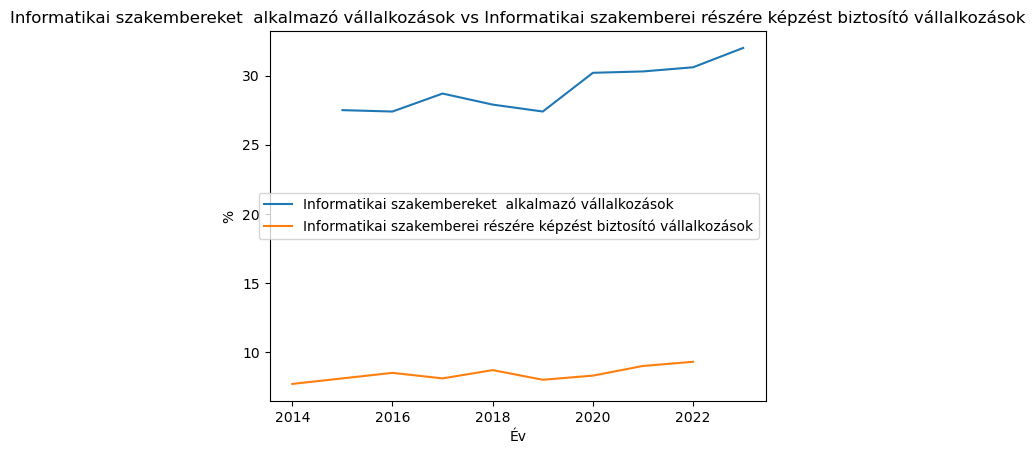

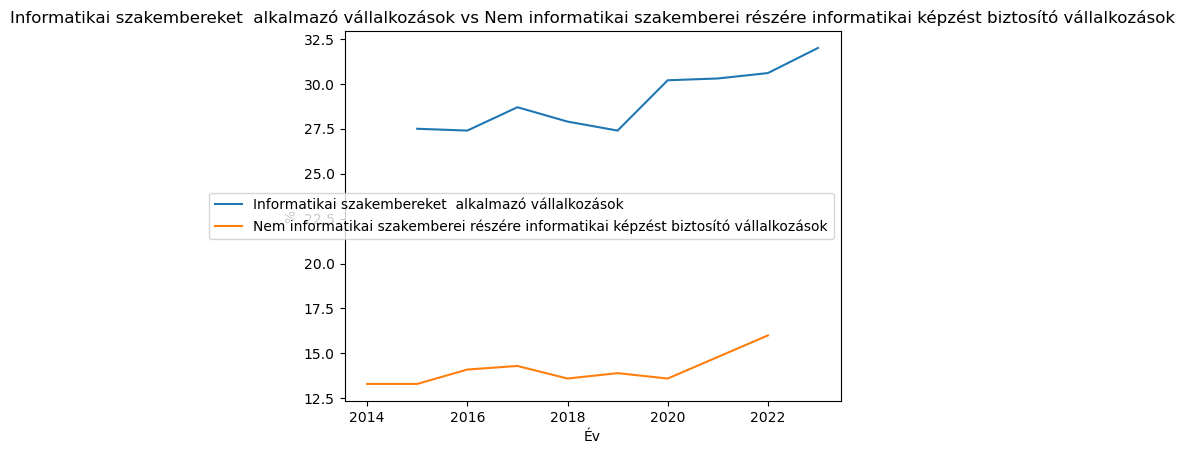

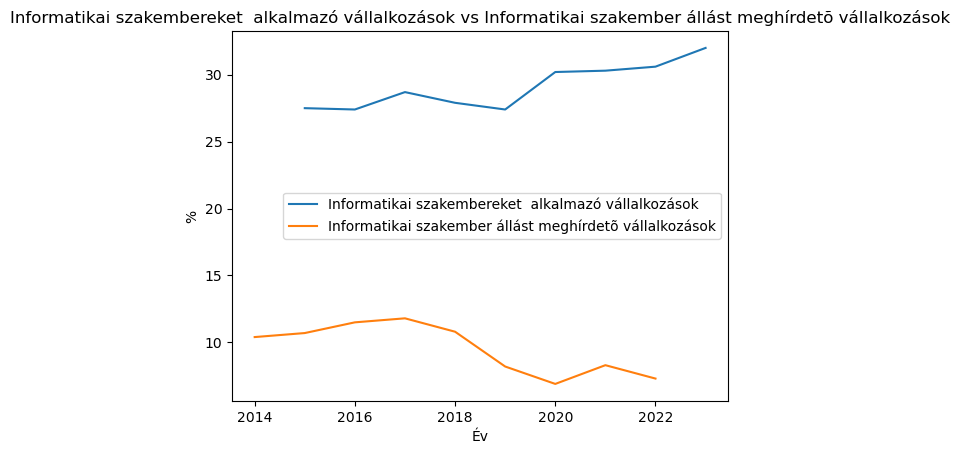

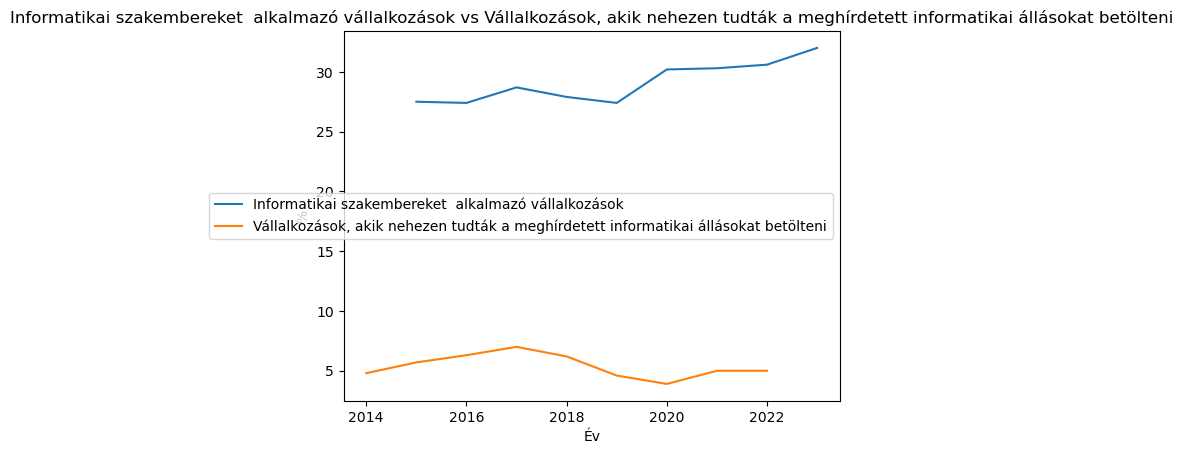

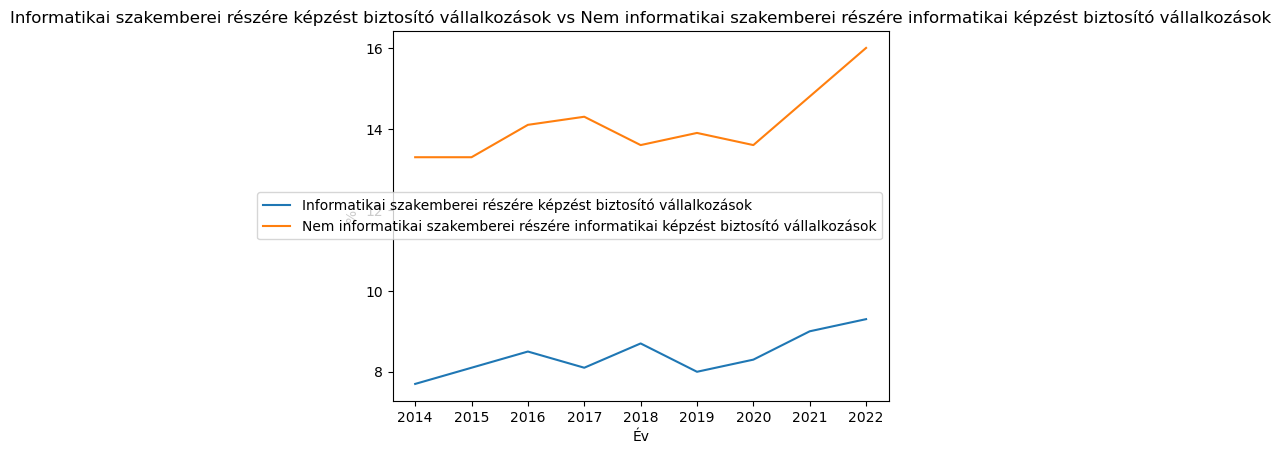

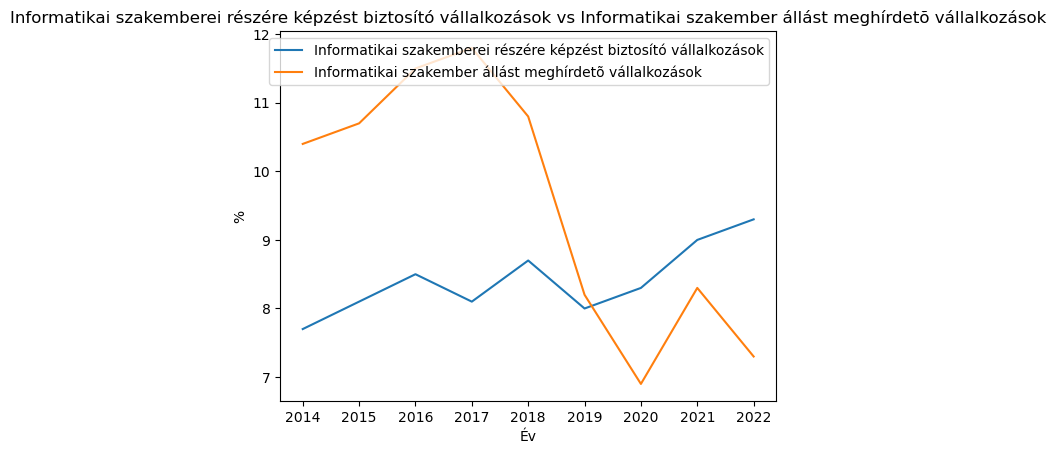

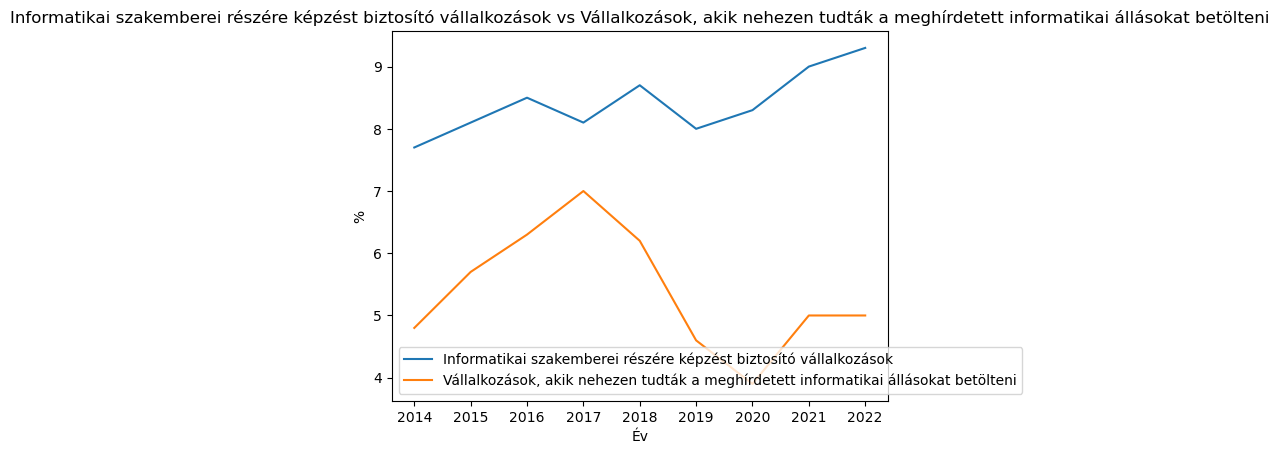

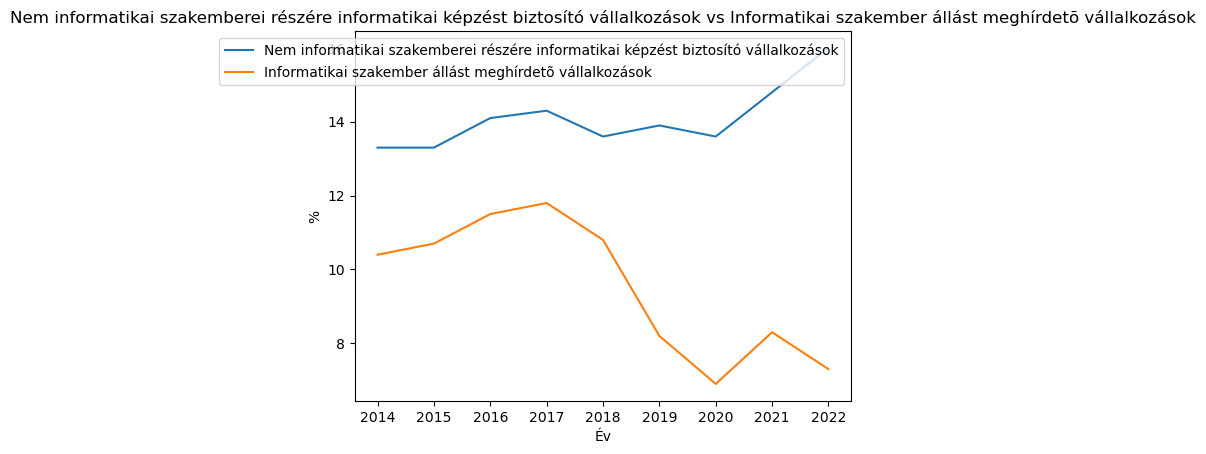

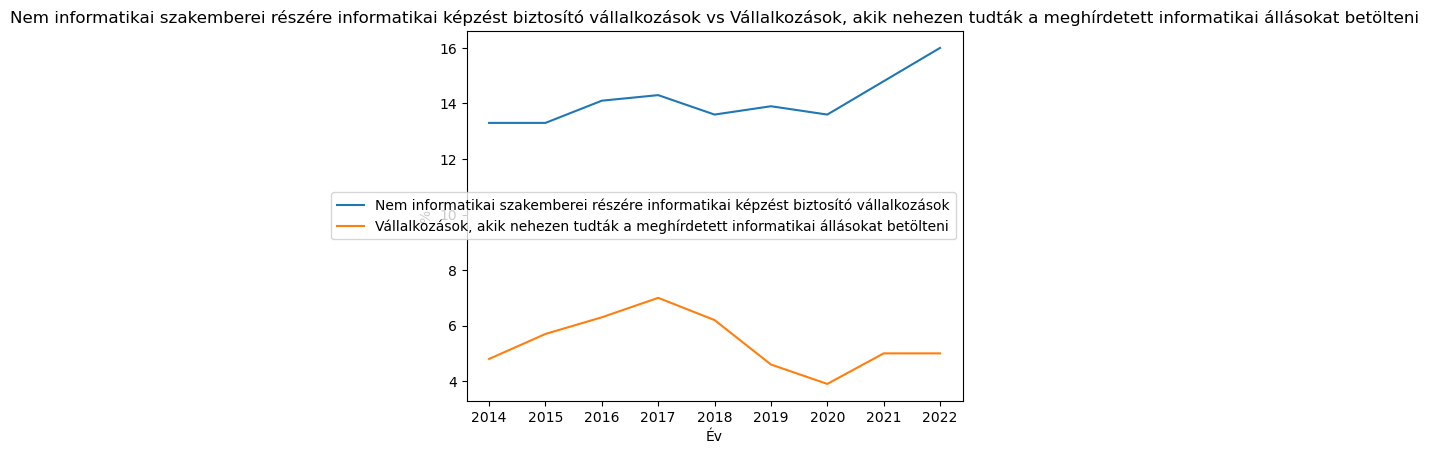

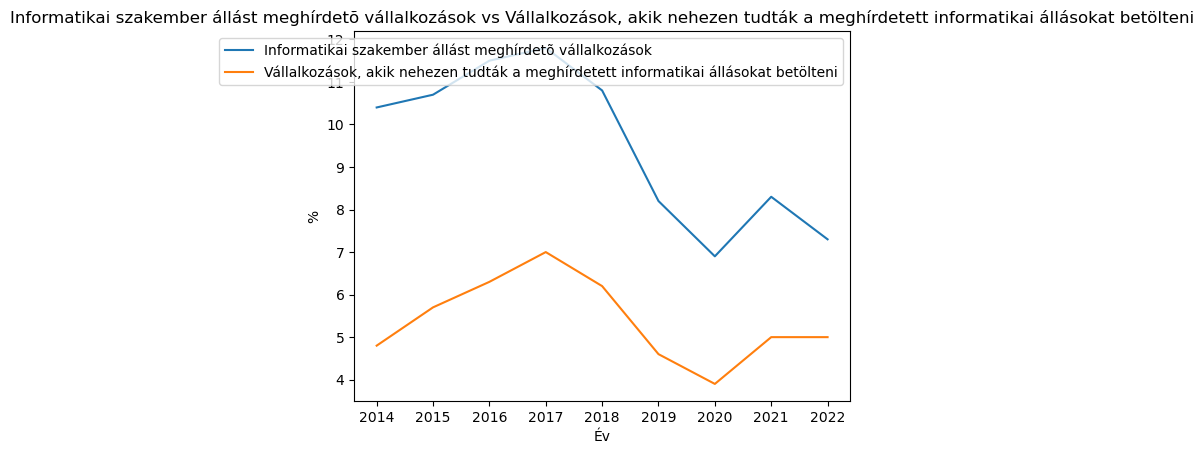

In [8]:
for outer in range(1, df.shape[1]):  
    
    column_outer = df.iloc[:, [0, outer]]  # 'Év' es egy oszlop
    
    for inner in range(outer + 1, df.shape[1]):
        
        column_inner = df.iloc[:, [0, inner]]  # 'Év' es egy masik oszlop

        # elso oszlop plot
        sns.lineplot(x='Év', y=column_outer.columns[1], data=column_outer, label=df.columns[outer])
        
        # masodik oszlop plot
        sns.lineplot(x='Év', y=column_inner.columns[1], data=column_inner, label=df.columns[inner])

        plt.title(f"{df.columns[outer]} vs {df.columns[inner]}")
        plt.xlabel("Év")
        plt.ylabel("%")
        plt.show()
        

In [12]:
#az utolso evet eltavolitom, mert a NaN ertekek zavarjak a linearis regressziot
linear_df=df.drop(axis=0, index=df.shape[0]-1)
#feltoltottem a hianyzo adatot a kovetkezo evi adatbol
linear_df.fillna(method='bfill', inplace=True)

C:\Users\nedo5\AppData\Local\Temp\ipykernel_15272\2569902601.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  linear_df.fillna(method='bfill', inplace=True)


In [13]:
for i in range(1, linear_df.shape[1]):
    res = stats.linregress(linear_df['Év'], linear_df.iloc[:, i])
    print(f"R-negyzet a(z) {linear_df.columns[i]} hoz/hez : {res.rvalue**2:.6f}")


R-negyzet a(z) Informatikai szakembereket  alkalmazó vállalkozások hoz/hez : 0.688586
R-negyzet a(z) Informatikai szakemberei részére képzést biztosító vállalkozások hoz/hez : 0.584510
R-negyzet a(z) Nem informatikai szakemberei részére informatikai képzést biztosító vállalkozások hoz/hez : 0.540296
R-negyzet a(z) Informatikai szakember állást meghírdetõ vállalkozások hoz/hez : 0.626149
R-negyzet a(z) Vállalkozások, akik nehezen tudták a meghírdetett informatikai állásokat betölteni hoz/hez : 0.157020


Nem linearis a valtozas, erre lehetett is szamitani, mivel sok komponense lehet a piac alakulasanak.